### seafood production data analysis

        Entity Code  Year  Aquaculture production (metric tons)  \
0  Afghanistan  AFG  1969                                  60.0   
1  Afghanistan  AFG  1970                                  60.0   
2  Afghanistan  AFG  1971                                  60.0   
3  Afghanistan  AFG  1972                                  60.0   
4  Afghanistan  AFG  1973                                  60.0   

   Capture fisheries production (metric tons)  
0                                       400.0  
1                                       400.0  
2                                       500.0  
3                                       500.0  
4                                       500.0  

 <Basic information for data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12727 entries, 0 to 12726
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity             

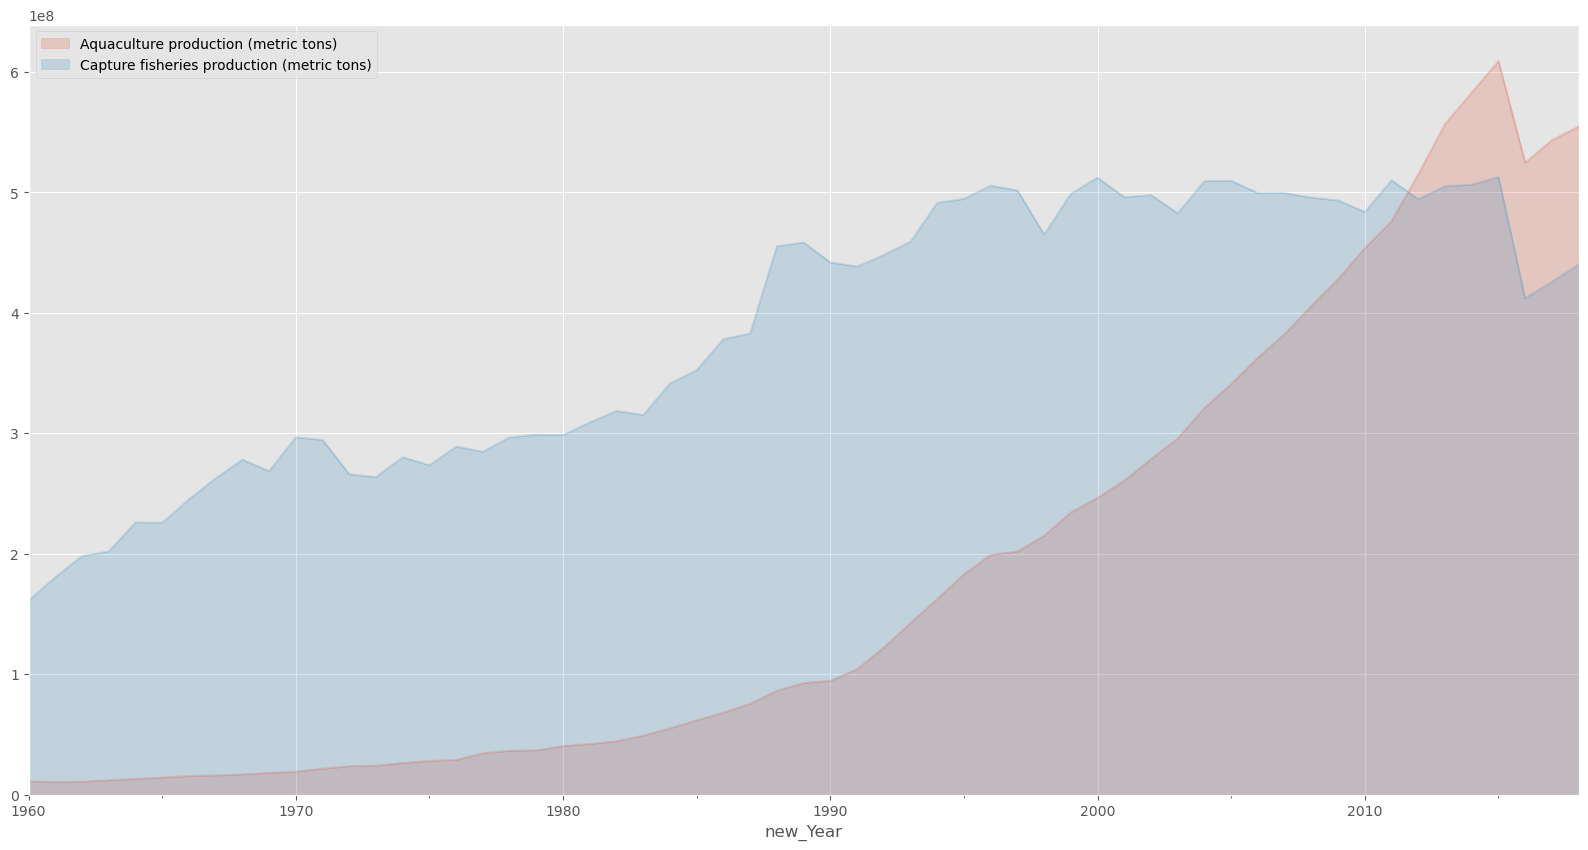


 <Compare visualizations of individual countries>


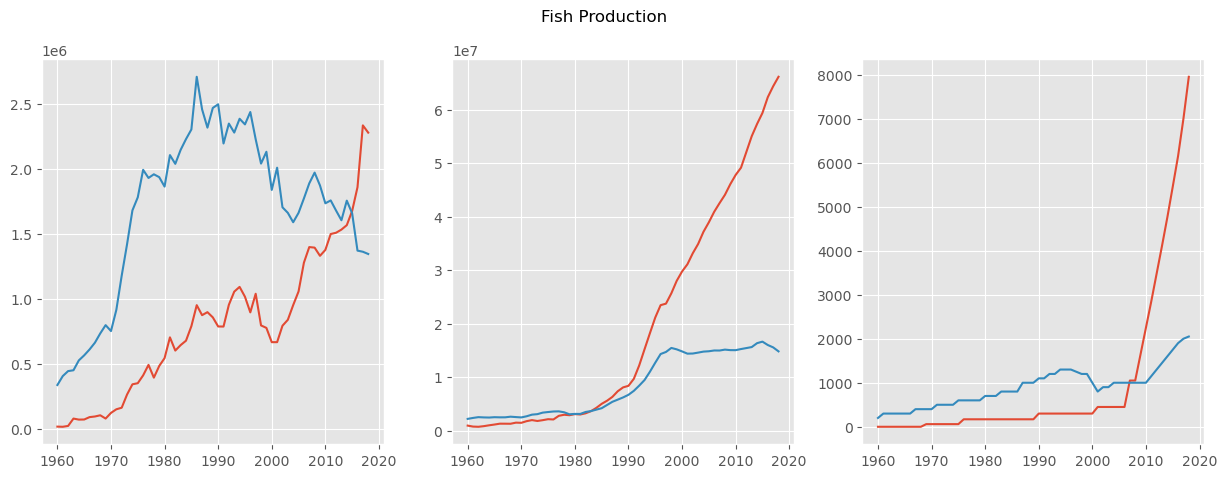

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('capture-fisheries-vs-aquaculture.csv')
print(df.head())

print('\n <Basic information for data>')
print(df.info())

print('\n <Delete Unecessary Columns>')
df.drop(['Code'], axis = 1, inplace = True)
print(df.head())

print('\n <Check missing values>')
print(df.isnull().sum())
print('\n => Replace missing value with zero')
change_value = 0
df.fillna(change_value, inplace = True)
print('\n <Check missing values>')
print(df.isnull().sum())

print('\n <Converts year data to time series data types and replaces indexes>')
df['new_Year'] = pd.to_datetime(df['Year'].astype(str), format = '%Y')
df.set_index('new_Year', inplace = True)
df.drop(['Year'], axis = 1, inplace = True)
print(df.head())

print('\n <Convert country data to categorical data>')
new_df = df.sort_index()
new_df['Entity'] = new_df['Entity'].astype('category')
print(new_df.info())
print('\n <Check the number of unique data per country>')
print(new_df['Entity'].value_counts())

print('\n <Trends in data between Aquaculture and Capture fisheries production \
        worldwide from the 1960s to the present>')
g = new_df.groupby(['new_Year'])
world_total = g.sum(numeric_only = True)
plt.style.use('ggplot')
world_total.plot(kind = 'area', alpha = 0.2, stacked = False, figsize = (20, 10))
plt.legend()
plt.show()

print('\n <Compare visualizations of individual countries>')
s = new_df.loc[new_df['Entity'] == 'South Korea']
c = new_df.loc[new_df['Entity'] == 'China']
a = new_df.loc[new_df['Entity'] == 'Afghanistan']
s_y = s[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
s_x = s.index
c_y = c[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
c_x = c.index
a_y = a[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
a_x = a.index
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(s_x, s_y)
axs[1].plot(c_x, c_y)
axs[2].plot(a_x, a_y)
fig.suptitle('Fish Production')
plt.show()